In [1]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:

df = pd.read_csv('data/CreditScoring.csv')
df.columns = df.columns.str.lower()

In [3]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [4]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [5]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [6]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

* What are the categorical variables? What are the numerical?

In [7]:
df.select_dtypes(exclude = ['object'])

,seniority,time,age,expenses,income,assets,debt,amount,price,default
0,9,60,30,73,129,0,0,800,846,0
1,17,60,58,48,131,0,0,1000,1658,0
2,10,36,46,90,200,3000,0,2000,2985,1
3,0,60,24,63,182,2500,0,900,1325,0
4,0,36,26,46,107,0,0,310,910,0
...,...,...,...,...,...,...,...,...,...,...
4449,1,60,39,69,92,0,0,900,1020,1
4450,22,60,46,60,75,3000,600,950,1263,0
4451,0,24,37,60,90,3500,0,500,963,1
4452,0,48,23,49,140,0,0,550,550,0


In [8]:
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [9]:
df_numeric = df[['seniority', 'time', 'age', 'expenses', 'income','assets','debt','amount','price','default']]

df_category = df[['home','marital','records','job']]

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

In [15]:
numeric = ['seniority', 'time', 'age', 'expenses', 'income','assets','debt','amount','price','default']
category = ['home','marital','records','job']
features = numeric

### Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [17]:
df_train['default'].values

array([1, 0, 0, ..., 1, 0, 0])

In [18]:

for c in features:
    
    auc_value = roc_auc_score(df_train['default'].values, df_train[c])
    print("Feature Name:",c," ", auc_value)


Feature Name: seniority   0.2906221375508058
Feature Name: time   0.5608662489595051
Feature Name: age   0.4267066727500061
Feature Name: expenses   0.4990815782782989
Feature Name: income   0.31799333386736695
Feature Name: assets   0.35139574328771983
Feature Name: debt   0.49521703242164505
Feature Name: amount   0.5910773431595518
Feature Name: price   0.5043329862114843
Feature Name: default   1.0


***Answer***:

**Q1**: time


### Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.512
* 0.612
* 0.712
* 0.812

In [19]:
df_train = df_train[['seniority', 'income', 'assets', 'records', 'job', 'home']]
df_val = df_val[['seniority', 'income', 'assets', 'records', 'job', 'home']]
df_test = df_test[['seniority', 'income', 'assets', 'records', 'job', 'home']]

In [21]:

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)



model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [24]:
dv = DictVectorizer(sparse=False)

val_dict = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dict)


y_pred = model.predict_proba(X_val)[:, 1]

In [26]:

round(roc_auc_score(y_val, y_pred),3)

0.812

***Answer***:

**Q2**: 0.812


### Q3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [36]:
thresholds = np.arange(0, 1, 0.01)


scores = []


for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [37]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)


df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)


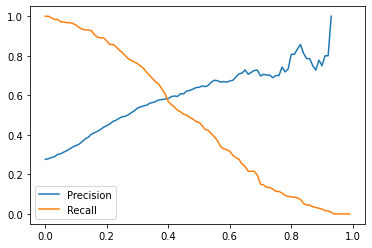

In [39]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()


***Answer***:

**Q3**: 0.4

### Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [42]:
F1 = 2 * ((df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall']))

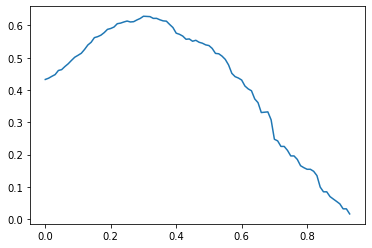

In [43]:
plt.plot(df_scores.threshold, F1, label='Precision')

***Answer***:

**Q4**: 0.3

### Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

* KFold(n_splits=5, shuffle=True, random_state=1)
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

In [46]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [47]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [48]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [49]:
n_splits = 5

# for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

NameError: name 'df_full_train' is not defined

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [ ]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [ ]:
p = tp / (tp + fp)
r = tp / (tp + fn)

In [21]:
np.argmax(df_train[c].values, axis=0)

1868

In [39]:
df['default'].head()

0    0
1    0
2    1
3    0
4    0
Name: default, dtype: int64

In [49]:
df_train.head().T

,0,1,2,3,4
seniority,12,4,0,6,12
home,private,other,owner,owner,owner
time,24,60,60,48,36
age,28,28,27,28,42
marital,married,married,married,married,married
records,no,no,no,no,no
job,fixed,fixed,fixed,fixed,freelance
expenses,45,60,35,45,60
income,102,143,295,114,0
assets,0,0,6000,3500,15000
